In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

## Loading data

In [2]:
target_test = pd.read_csv('./data/gender_submission.csv', encoding='utf-8')
train = pd.read_csv('./data/train.csv', encoding='utf-8')
test_no_target = pd.read_csv('./data/test.csv', encoding='utf-8')

In [3]:
print(target_test.shape)
print(train.shape)
print(test_no_target.shape)

(418, 2)
(891, 12)
(418, 11)


In [4]:
target_test.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test_no_target.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test = pd.merge(test_no_target, target_test, how='left', on='PassengerId')

In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Missing values

In [9]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
train = train.drop(["Cabin"], axis=1)

## Target balance

In [11]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

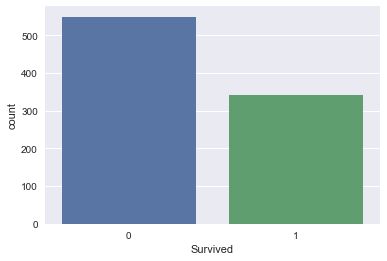

In [12]:
sns.countplot(train.Survived)

## Data description

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [14]:
num_var = ['Age', 'Fare', 'SibSp', 'Parch']
cat_var = ['Pclass', 'Sex', 'Embarked']
string_var = ['Name', 'Ticket']

In [15]:
train[num_var].describe()

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


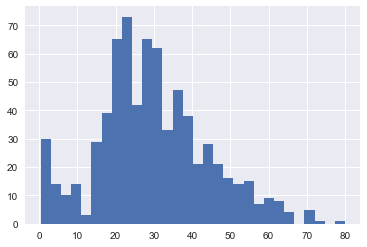

In [16]:
train.Age.hist(bins=30)

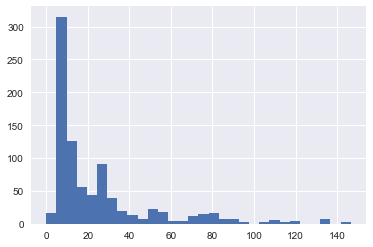

In [17]:
train[train.Fare < 150].Fare.hist(bins=30)

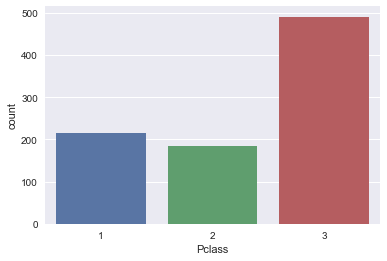

In [18]:
sns.countplot(train.Pclass)

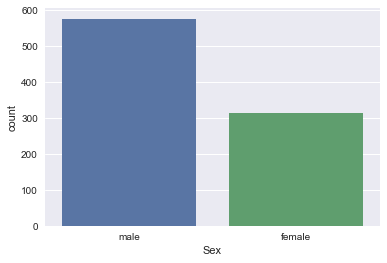

In [19]:
sns.countplot(train.Sex)

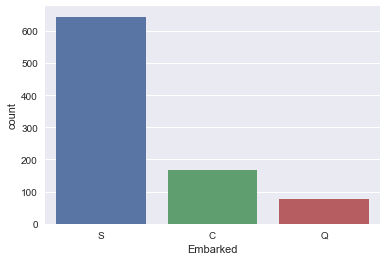

In [20]:
sns.countplot(train.Embarked)

## Univariate analysis

/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


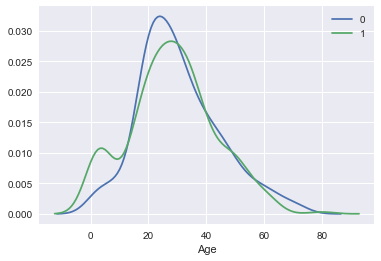

In [21]:
sns.distplot(train[train['Survived'] == 0].Age.dropna(), hist=False, label='0')
sns.distplot(train[train['Survived'] == 1].Age.dropna(), hist=False, label='1')

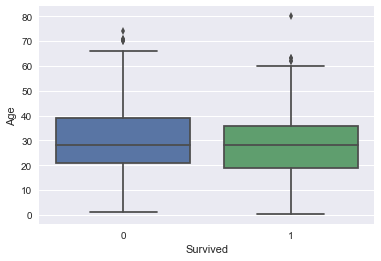

In [22]:
sns.boxplot(train.Survived, train.Age)

/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


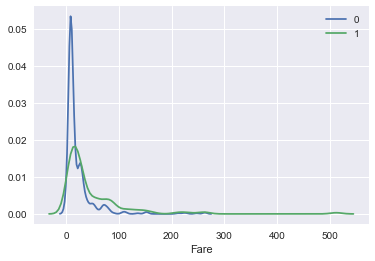

In [23]:
sns.distplot(train[train['Survived'] == 0].Fare.dropna(), hist=False, label='0')
sns.distplot(train[train['Survived'] == 1].Fare.dropna(), hist=False, label='1')

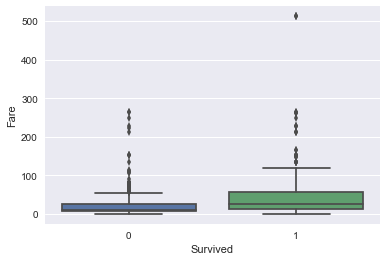

In [24]:
sns.boxplot(train.Survived, train.Fare)

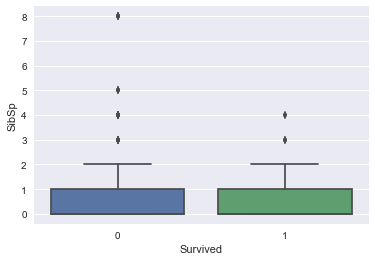

In [25]:
sns.boxplot(train.Survived, train.SibSp)

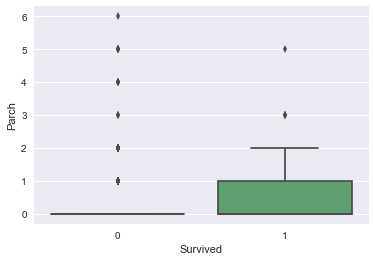

In [26]:
sns.boxplot(train.Survived, train.Parch)

In [27]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

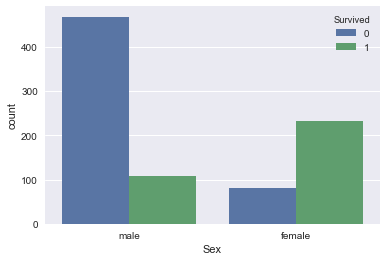

In [28]:
sns.countplot('Sex', hue='Survived', data=train)

In [29]:
train.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

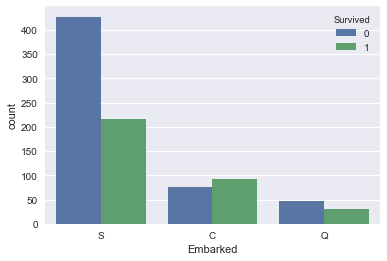

In [30]:
sns.countplot('Embarked', hue='Survived', data=train)

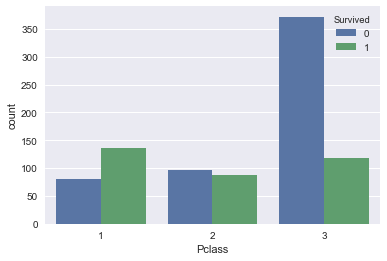

In [31]:
sns.countplot('Pclass', hue='Survived', data=train)

In [32]:
pd.crosstab(train.Pclass, train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


## Multivariate analysis

In [33]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

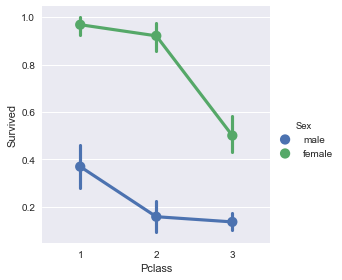

In [34]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train)

In [35]:
pd.crosstab(train.Embarked, train.Pclass, margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


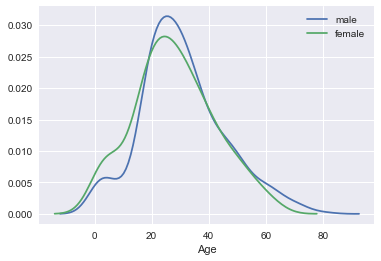

In [36]:
sns.distplot(train[train['Sex'] == 'male'].Age.dropna(), hist=False, label='male')
sns.distplot(train[train['Sex'] == 'female'].Age.dropna(), hist=False, label='female')

/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


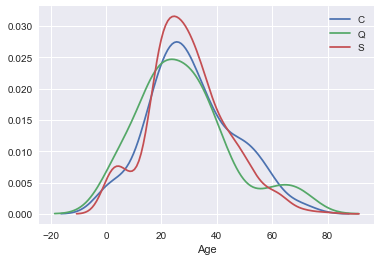

In [37]:
sns.distplot(train[train['Embarked'] == 'C'].Age.dropna(), hist=False, label='C')
sns.distplot(train[train['Embarked'] == 'Q'].Age.dropna(), hist=False, label='Q')
sns.distplot(train[train['Embarked'] == 'S'].Age.dropna(), hist=False, label='S')

/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


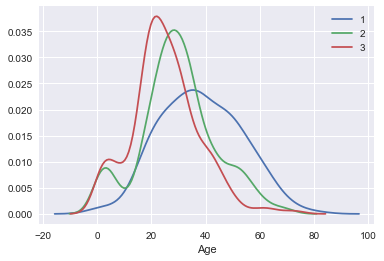

In [38]:
sns.distplot(train[train['Pclass'] == 1].Age.dropna(), hist=False, label='1')
sns.distplot(train[train['Pclass'] == 2].Age.dropna(), hist=False, label='2')
sns.distplot(train[train['Pclass'] == 3].Age.dropna(), hist=False, label='3')

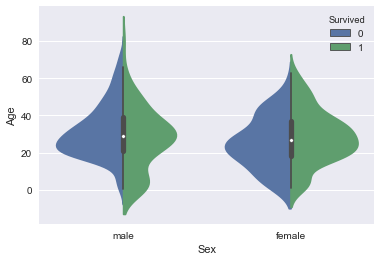

In [39]:
sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True)

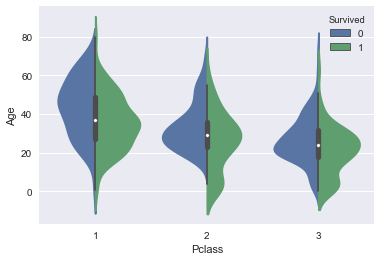

In [40]:
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, split=True)

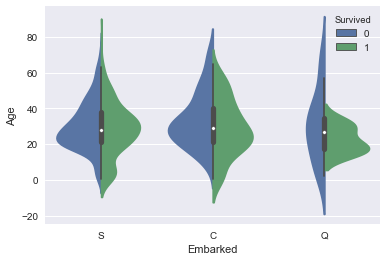

In [41]:
sns.violinplot('Embarked', 'Age', hue='Survived', data=train, split=True)

In [42]:
train.Name[1][train.Name[1].find(',')+2:train.Name[1].find('.')]

'Mrs'

In [43]:
pd.crosstab(train.SibSp, train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


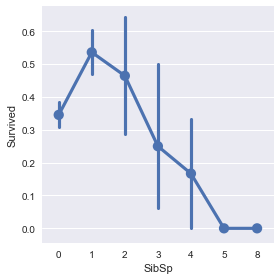

In [44]:
sns.factorplot('SibSp', 'Survived', data=train)

In [45]:
pd.crosstab(train.Parch, train.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


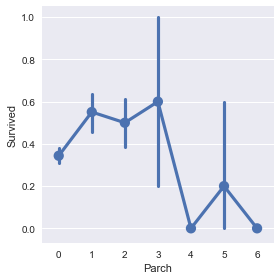

In [46]:
sns.factorplot('Parch', 'Survived', data=train)

/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


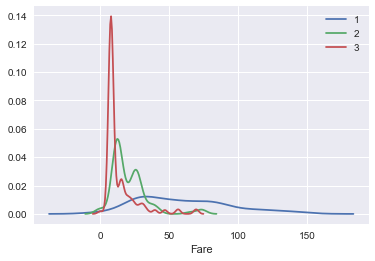

In [47]:
sns.distplot(train[(train['Pclass'] == 1) & (train['Fare'] < 150)].Fare.dropna(), hist=False, label='1')
sns.distplot(train[(train['Pclass'] == 2) & (train['Fare'] < 150)].Fare.dropna(), hist=False, label='2')
sns.distplot(train[(train['Pclass'] == 3) & (train['Fare'] < 150)].Fare.dropna(), hist=False, label='3')

In [48]:
train[['Age', 'Fare', 'SibSp', 'Parch']]

,Age,Fare,SibSp,Parch
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
5,NaN,8.4583,0,0
6,54.0,51.8625,0,0
7,2.0,21.0750,3,1
8,27.0,11.1333,0,2
9,14.0,30.0708,1,0


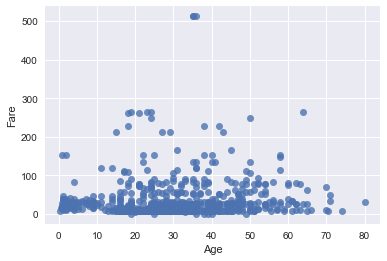

In [49]:
sns.regplot('Age', 'Fare', data=train, fit_reg=False)

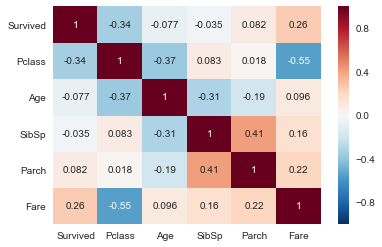

In [50]:
sns.heatmap(train.drop(['PassengerId'], axis=1).corr(), annot=True)

## Feature engineering

In [51]:
train['Status'] = train.Name.apply(lambda x: x[x.find(',')+2:x.find('.')])

In [52]:
train[train.Age.isnull()].groupby('Status').agg({'Status':'count'})

,Status
Status,
Dr,1
Master,4
Miss,36
Mr,119
Mrs,17


In [53]:
train.groupby('Status').agg({'Age':'count'})

,Age
Status,
Capt,1
Col,2
Don,1
Dr,6
Jonkheer,1
Lady,1
Major,2
Master,36
Miss,146


In [54]:
train.groupby('Status').agg({'Age':'mean'})

,Age
Status,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167
Miss,21.773973


In [55]:
train.Status = train.Status.apply(lambda x: 'Other' if x not in ['Mr', 'Mrs', 'Master', 'Miss'] else x)

In [56]:
Age_dict = dict(train.groupby('Status')['Age'].mean())

In [57]:
train.Age = train.Age.fillna(train.Status.map(Age_dict))

/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


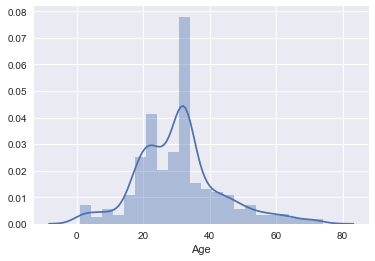

In [58]:
sns.distplot(train[train.Survived == 0].Age)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


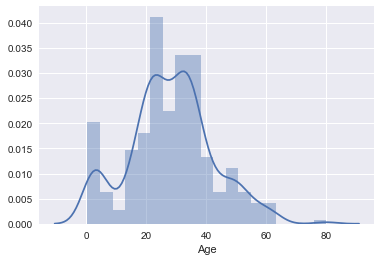

In [60]:
sns.distplot(train[train.Survived == 1].Age)

/Users/samimhirech/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


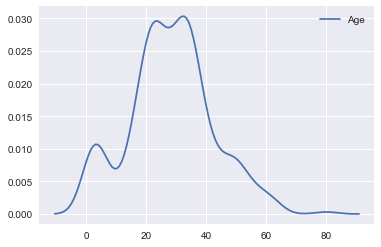

In [79]:
sns.kdeplot(train[train.Survived == 1].Age)

In [61]:
train.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [62]:
train.Embarked.isnull().sum()

2

In [63]:
train.Embarked.fillna('S', inplace=True)

In [64]:
print('Maximum age: ', max(train.Age))
print('Minimum age: ', min(train.Age))
print('Average age: ', np.round(sum(train.Age)/len(train.Age),2))

Maximum age:  80.0
Minimum age:  0.42
Average age:  29.76


In [65]:
train['Age_group'] = np.floor((train.Age - 0.1)/ 20)

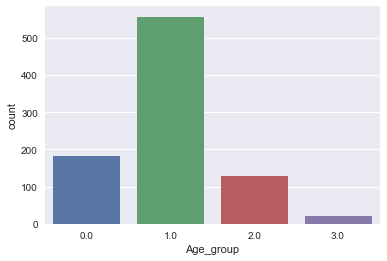

In [66]:
sns.countplot('Age_group', data=train)

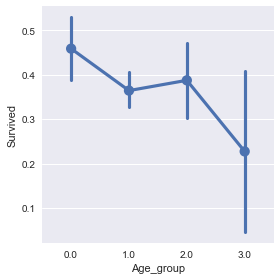

In [67]:
sns.factorplot('Age_group', 'Survived', data=train)

In [68]:
train['Family_size'] = train['SibSp'] + train['Parch']

In [69]:
train['Alone'] = train.Family_size.apply(lambda x: 0 if x > 0 else 1)

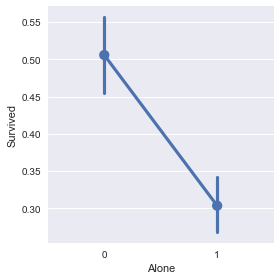

In [70]:
sns.factorplot('Alone', 'Survived', data=train)

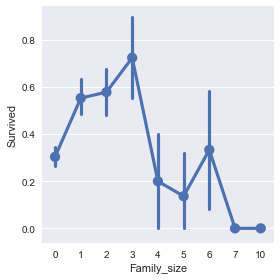

In [71]:
sns.factorplot('Family_size', 'Survived', data=train)

In [72]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,Age_group,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,1.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,1.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,1.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,1.0,0,1
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,Q,Mr,1.0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr,2.0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master,0.0,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs,1.0,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs,0.0,1,0


In [73]:
train.loc[train['Fare']<=train.Fare.describe().loc['25%'],'Fare_cat']=0
train.loc[(train['Fare']>train.Fare.describe().loc['25%'])&(train['Fare']<=train.Fare.describe().loc['50%']),'Fare_cat']=1
train.loc[(train['Fare']>train.Fare.describe().loc['50%'])&(train['Fare']<=train.Fare.describe().loc['75%']),'Fare_cat']=2
train.loc[train['Fare']>train.Fare.describe().loc['75%'],'Fare_cat']=3

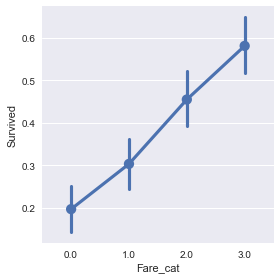

In [74]:
sns.factorplot('Fare_cat', 'Survived', data=train)

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le_sex = LabelEncoder()
le_sex.fit(train.Sex)
train['Sex_encod'] = le_sex.transform(train.Sex)

le_emb = LabelEncoder()
le_emb.fit(train.Embarked)
train['Embarked_encod'] = le_emb.transform(train.Embarked)

le_stat = LabelEncoder()
le_stat.fit(train.Status)
train['Status_encod'] = le_stat.transform(train.Status)

In [77]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,Age_group,Family_size,Alone,Fare_cat,Sex_encod,Embarked_encod,Status_encod
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,1.0,1,0,0.0,1,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,Mrs,1.0,1,0,3.0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Miss,1.0,0,1,1.0,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,Mrs,1.0,1,0,3.0,0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,1.0,0,1,1.0,1,2,2
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,Q,Mr,1.0,0,1,1.0,1,1,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,Mr,2.0,0,1,3.0,1,2,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S,Master,0.0,4,0,2.0,1,2,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S,Mrs,1.0,2,0,1.0,0,2,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C,Mrs,0.0,1,0,2.0,0,0,3


## Dropping features

In [86]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Status', 'Age_group',
       'Family_size', 'Alone', 'Fare_cat', 'Sex_encod', 'Embarked_encod',
       'Status_encod'],
      dtype='object')

In [87]:
data = train

In [88]:
var_drop = ['PassengerId', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Status']

In [89]:
data.drop(var_drop, axis=1, inplace=True)

In [90]:
data.Age_group = data.Age_group.astype('int64')
data.Fare_cat = data.Fare_cat.astype('int64')

In [91]:
data.dtypes

Survived          int64
Pclass            int64
Age_group         int64
Family_size       int64
Alone             int64
Fare_cat          int64
Sex_encod         int64
Embarked_encod    int64
Status_encod      int64
dtype: object

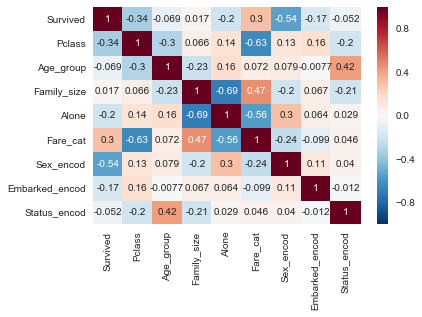

In [92]:
sns.heatmap(data.corr(), annot=True)

## Modeling

Let us try : 
* Logistic Regression
* SVM 
* Naive Bayes
* LDA/QDA
* K-NN
* Random Forrest
* XGBoost

In [94]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB, MultinomialNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [95]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [96]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_fscore_support

In [97]:
kfold = KFold(n_splits=10, random_state=42) 

In [98]:
cv_results = []

#### Logistic Regression

In [99]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the Logistic Regression is 0.805970149254


/Users/samimhirech/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
cv_score = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
cv_results.append(['Logistic Regression', cv_score])

#### SVM

In [101]:
model=svm.SVC(kernel='linear',C=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.791044776119


/Users/samimhirech/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
cv_score = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
cv_results.append(['Linear SVM', cv_score])

#### Decision Tree

In [103]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Decision Tree is 0.798507462687


In [104]:
cv_score = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
cv_results.append(['Decision Tree', cv_score])

#### K-NN 

In [105]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the KNN is 0.794776119403


/Users/samimhirech/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [106]:
cv_score = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
cv_results.append(['K-NN', cv_score])

#### Naive Bayes

In [107]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the NaiveBayes is 0.805970149254


/Users/samimhirech/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
cv_score = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
cv_results.append(['Gaussian Naive Bayes', cv_score])

#### Random Forest

In [109]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction6,test_Y))

/Users/samimhirech/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


The accuracy of the Random Forests is 0.828358208955


In [110]:
cv_score = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
cv_results.append(['Random Forest', cv_score])

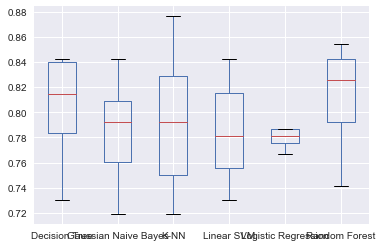

In [111]:
pd.DataFrame(dict(cv_results)).boxplot(figsize = (20,20))

#### XGBoost

In [112]:
import xgboost as xgb

In [113]:
xgboost=xgb.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.821669787765


## Confusion Matrix

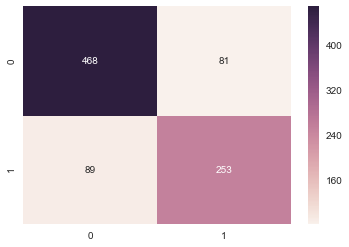

In [114]:
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True, fmt='2.0f')

In [115]:
precision_recall_fscore_support(Y,y_pred)

(array([ 0.84021544,  0.75748503]),
 array([ 0.85245902,  0.73976608]),
 array([ 0.84629295,  0.74852071]),
 array([549, 342]))

## Fine-tuning

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   29.9s finished


0.802469135802
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


In [118]:
gd.best_params_

{'n_estimators': 600}

## ROC-AUC Curve

In [119]:
model=RandomForestClassifier(n_estimators = 600)
model.fit(train_X,train_Y)
y_pred = model.predict(test_X)
y_score = model.predict_proba(test_X)

/Users/samimhirech/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [120]:
from sklearn.metrics import roc_auc_score, roc_curve

In [121]:
auc = roc_auc_score(test_Y, y_score[:, 1])

In [122]:
fpr, tpr, thresholds = roc_curve(test_Y, y_score[:, 1])

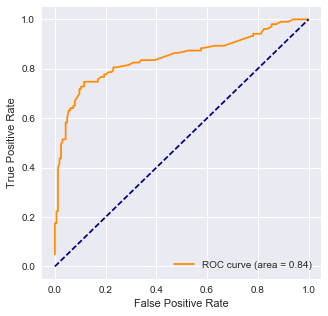

In [123]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

## Feature importance

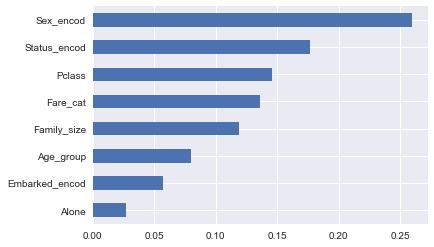

In [124]:
pd.Series(model.feature_importances_, train_X.columns).sort_values(ascending=True).plot.barh()

## Extra : PCA

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [132]:
from sklearn.decomposition import PCA
n_components = 4
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

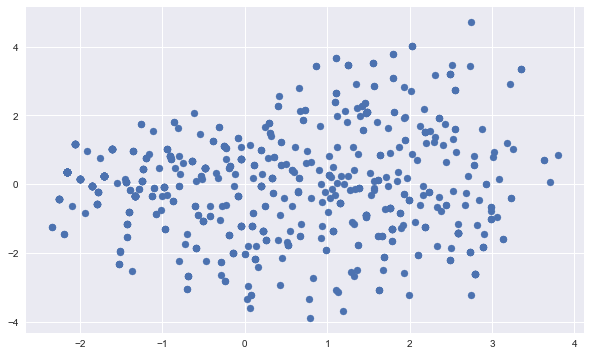

In [133]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], cmap='plasma')
plt.xlabel = "First Principal Component"
plt.ylabel = "Second Principal component"
plt.show()

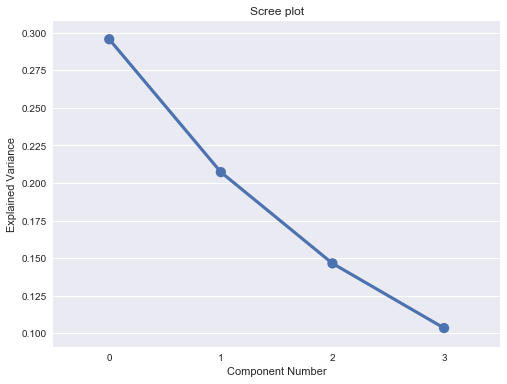

In [134]:
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [140]:
data_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
data_pca['Survived'] = data['Survived']

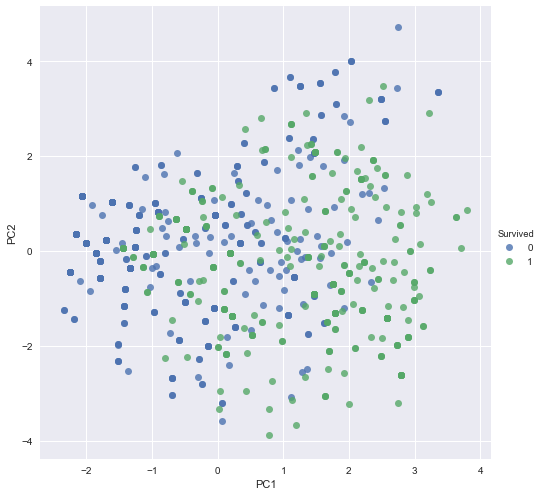

In [142]:
g = sns.lmplot(
    'PC1',
    'PC2',
    hue='Survived',
    data=data_pca,
    fit_reg=False,
    scatter=True,
    size=7,
    )
 
plt.show()

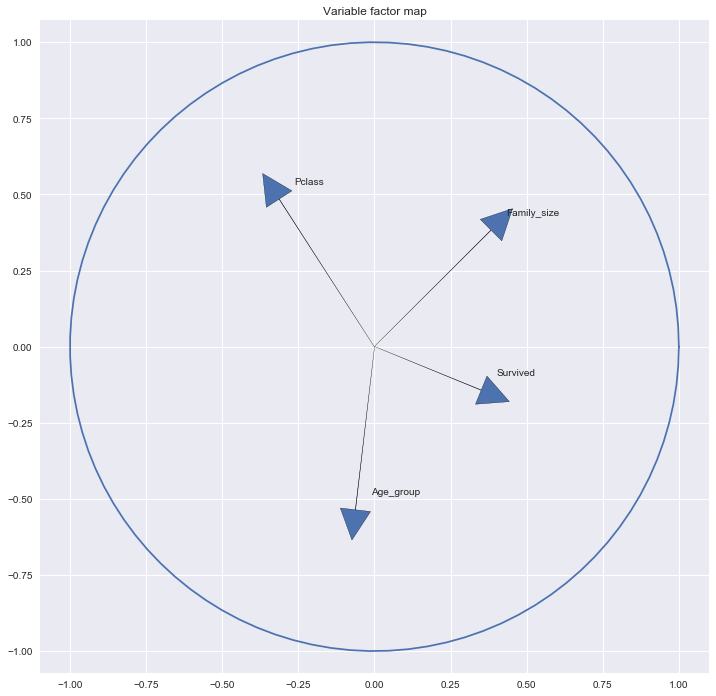

In [144]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_)):
    ax.arrow(0, 0,  # Start the arrow at the origin
             pca.components_[0, i], pca.components_[1, i],  # 0 and 1 correspond to dimension 1 and 2
             head_width=0.1,head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, data.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

## Extra : K-means

In [146]:
from sklearn.cluster import KMeans

In [147]:
Kmean = KMeans(n_clusters=2)

In [149]:
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [169]:
centers = Kmean.cluster_centers_

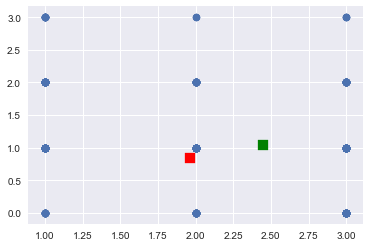

In [176]:
var_1 = 0
var_2 = 1

plt.scatter(X.iloc[:, var_1], X.iloc[:, var_2], s=50)
plt.scatter(centers[0][var_1], centers[0][var_2], s=100, c="green", marker="s")
plt.scatter(centers[1][var_1], centers[1][var_2], s=100, c="red", marker="s")

In [178]:
clusters = Kmean.labels_

In [ ]:
#To predict on new set
#Kmean.predict(second_test)

In [ ]:
# Cost function

for k in range(2,10):
    print(k)
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(scaledData.sample(False, 0.1, seed=42))
    cost[k] = model.computeCost(scaledData)

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),cost[2:10])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
kmeans = KMeans().setK(7).setSeed(1)

model = kmeans.fit(scaledData)

In [ ]:
predictions = model.transform(scaledData)

In [ ]:
evaluator = ClusteringEvaluator()

#### Plot 3D

In [ ]:
# Choose here your 3 varibles
plot_var = ['amount_float', 'age', 'activity_merchant_encod']

plot_df = predictions.select(plot_var + ['prediction'])
plot_df = plot_df.limit(100000).toPandas()

plot_df.prediction.value_counts()

In [ ]:
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(plot_df[plot_var[0]], plot_df[plot_var[1]], plot_df[plot_var[2]], c = plot_df.prediction)
threedee.set_xlabel(plot_var[0])
threedee.set_ylabel(plot_var[1])
threedee.set_zlabel(plot_var[2])
plt.show()

#### Plot 2D 

In [ ]:
plot_var = ['age', 'amount_float']

plot_df = predictions.select(plot_var + ['prediction'])
plot_df = plot_df.limit(100000).toPandas()

plot_df.prediction.value_counts()

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(plot_df[plot_var[0]], plot_df[plot_var[1]], c=plot_df.prediction)
plt.xlabel('Age')
plt.ylabel('Amount (€)')
plt.title('Clustering predictions')
plt.yscale('symlog')
plt.show()

#### Plot feature importance for each center

In [ ]:
for i in range(1,8):
    plt.figure(figsize=(10,8))
    plt.bar(centers.columns, centers.loc[i-1, :])
    plt.xlabel('Variables', fontsize=10)
    plt.ylabel('Standard scaled value', fontsize=10)
    plt.xticks(rotation='vertical')
    plt.title('Cluster '+str(i))
    plt.show()

#### Plot center importance for each feature

In [ ]:
for column in centers.columns:
    plt.bar(range(1,8), centers[column])
    plt.xlabel('Cluster', fontsize=5)
    plt.ylabel(column, fontsize=5)
    #plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title(column+' for all cluters')
    plt.show()

## Extra : additional features and functions

#### Row function

In [ ]:
def sales_mix(row):
    begin = row['date']
    end = row['datefine']
    station = row['stazione']
    data = sales_final[sales_final['stazione'] == station]
    data = data[(data['giorno'] <= end) & (data['giorno']>=begin)]
    return sum(data.totale)

In [ ]:
mix_final['sales_total'] = mix_final.apply(sales_mix, axis=1)

#### Evaluation : Regression

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

from sklearn.metrics import  mean_squared_error
mean_squared_error(y_test, y_test_pred)

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

#### Evaluation : Classification

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_pred)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

#### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import (RandomizedSearchCV, KFold)
from sklearn.externals import joblib

In [ ]:
parameters = {
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.2, 0.5],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [1, 2, 3, 4, 5],
    'min_child_weight': [20, 30, 50, 100, 150, 200],
    'missing': [np.nan],
    'n_estimators': [100, 120, 150, 170, 200],
    'reg_alpha': [0.01],
    'reg_lambda': [0.01],
    'scale_pos_weight': [20],
    'subsample': [0.6, 0.7, 0.8]
}

In [ ]:
model = xgb.XGBClassifier()

numFolds = 5
kfold_5 = KFold(shuffle = True, n_splits = numFolds)
n_jobs = 20
n_iter = 3

clf = RandomizedSearchCV(model, 
                         parameters, 
                         n_jobs=n_jobs, 
                         cv=kfold_5, 
                         verbose=True, 
                         scoring='r2', 
                         n_iter=n_iter)
clf.fit(data_x, data_y)

In [ ]:
best_r2 = clf.best_score_
best_params = clf.best_params_

print('Best R2 score : {0}'.format(-best_r2))
print('Best parameters : {0}'.format(best_params))

In [ ]:
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(data_x, data_y)

# Put here the path where you want to dump your model
#path =
model_name = 'xgb_storemix'

# Uncomment this section to dump the model
#print('Dumping trained model to : {0}/{1}.pkl'.format(path, model_name))
#joblib.dump(best_model, '{0}/{1}.pkl'.format(path, model_name))

#### Using os listdir

In [ ]:
features_list = []
features_label = []
# load labeled training / test data
# loop over the 10 directories where each directory stores the images of a digit
for digit in range(10):
    label = digit
    training_directory = 'labeled/' + str(label) + '/'
    for filename in os.listdir(training_directory):
        if (filename.endswith('.jpg')):
            training_digit_image = scipy.misc.imread(training_directory + filename)
            training_digit = color.rgb2gray(training_digit_image)
            training_digit = resize(training_digit, (50,50))
            df= hog(training_digit, orientations=8, pixels_per_cell=(10,10), cells_per_block=(5, 5))

            # extra digit's Histogram of Gradients (HOG). Divide the image into 5x5 blocks and where block in 10x10
            # pixels
       
            features_list.append(df)
            features_label.append(label)

## Linear Regression

#### With sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
results = model.fit(X, y)

In [ ]:
print(model.intercept_, model.coef_)

#### With statsmodel

In [ ]:
import statsmodel.api as sm

X_sm = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X_sm).fit()

In [ ]:
model.summary()

In [ ]:
stats = []

for col in train.columns:

stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))

stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])

stats_df.sort_values('Percentage of missing values', ascending=False)